Titanic Classifier data set, the main task is to predict whether the passenger will survive or not. The survived column has two values where 0 indicates Not Survived, and 1 indicates Survived.

I shall go step by step with the first step been downloading the data, loading the data, and basic libraries . Moving forward with data exploration, data wrangling(cleaning) , data visualization, training our data and finally making predictions , finding out the accuracy of the model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
% matplotlib in line

UsageError: Line magic function `%` not found.


In [3]:
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA ANALYSIS AND VISUALIZATION

For further exploring the data, let us visually represent the data in order to get a better idea. Seaborn, Matplotlib data visualization libraries in Python are used in this Machine Learning Project.

<Axes: xlabel='Survived', ylabel='count'>

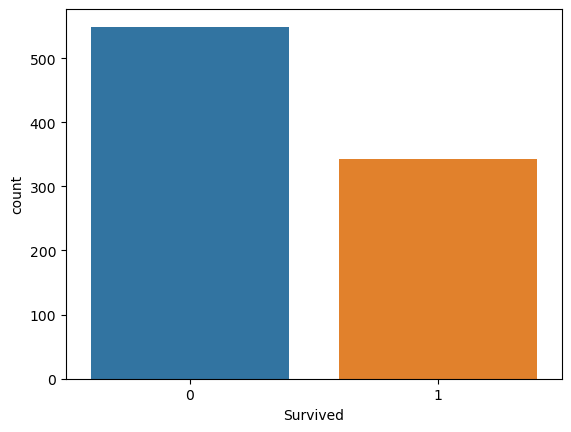

In [8]:
sns.countplot(x='Survived', data=titanic)

<Axes: xlabel='Survived', ylabel='count'>

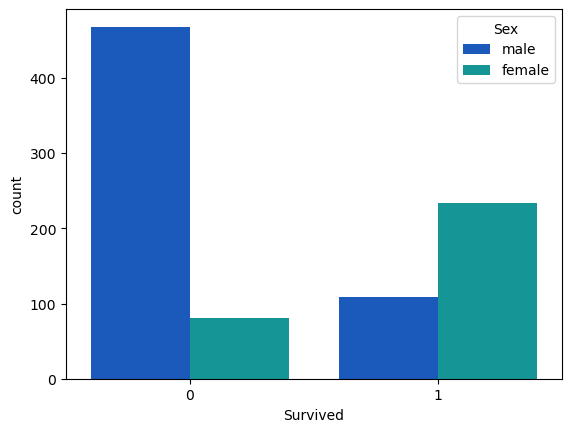

In [9]:
sns.countplot(x='Survived', hue='Sex', data=titanic , palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

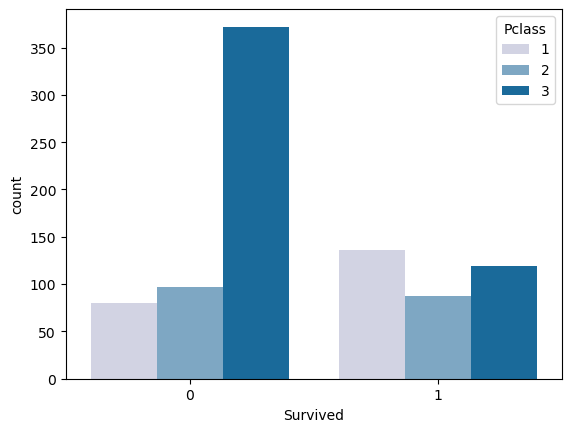

In [10]:
sns.countplot(x='Survived', hue='Pclass', data=titanic , palette='PuBu')

<Axes: ylabel='Frequency'>

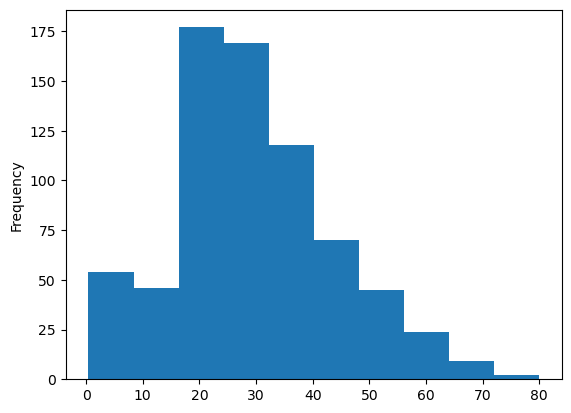

In [11]:
titanic['Age'].plot.hist()

<Axes: ylabel='Frequency'>

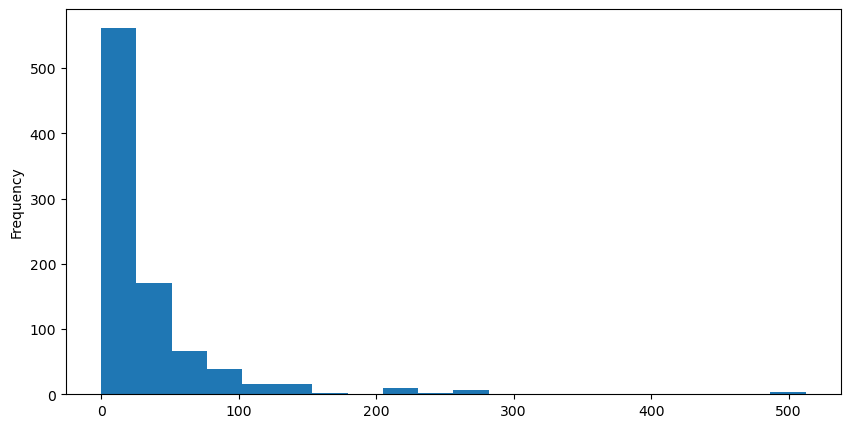

In [12]:
titanic['Fare'].plot.hist(bins=20 ,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

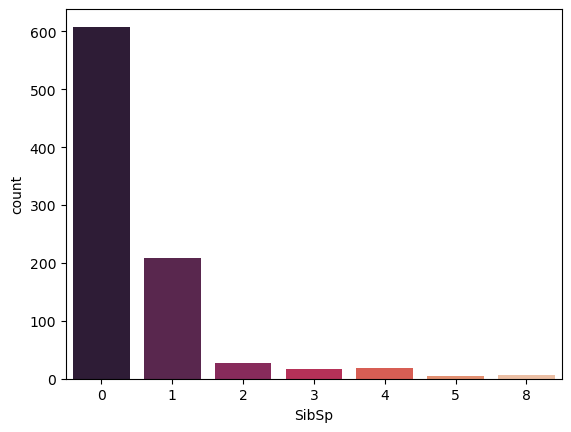

In [13]:
sns.countplot(x='SibSp', data=titanic, palette='rocket')

<Axes: ylabel='Frequency'>

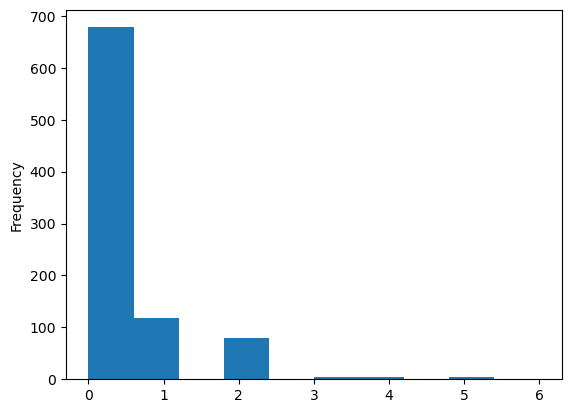

In [14]:
titanic['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

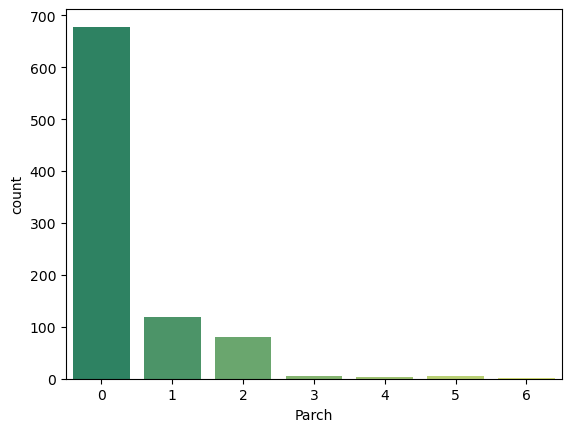

In [15]:
sns.countplot(x='Parch', data=titanic, palette='summer')

# DATA WTANGLING

In [16]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

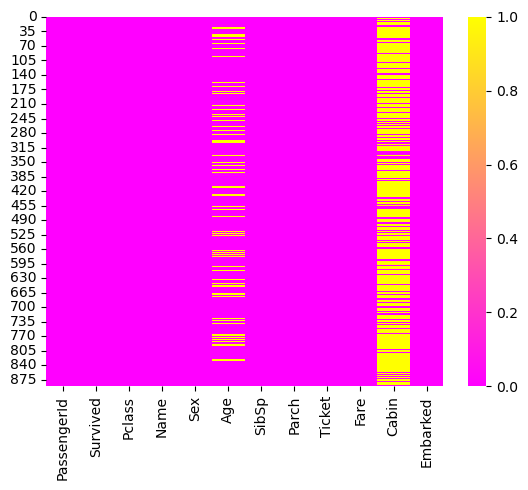

In [17]:
sns.heatmap(titanic.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

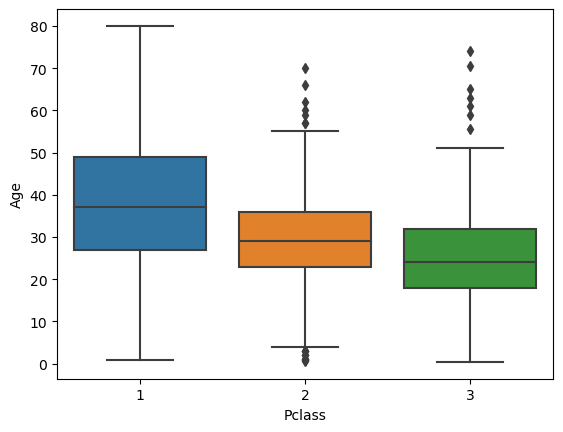

In [18]:
sns.boxplot(x='Pclass', data=titanic, y='Age')

# Dropping Columns

Drop the less significant columns in this case Cabin. the Cabin column is not conveying much information as insights can be gathered from other columns like PClass, Embarked etc. Hence, i dropped the Cabin Column. Also, check for any null values, if present we drop all the null values using dropna() function in Python.

In [19]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
titanic.drop('Cabin', axis=1 ,inplace=True)

In [21]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [22]:
titanic.dropna(inplace=True)

<Axes: >

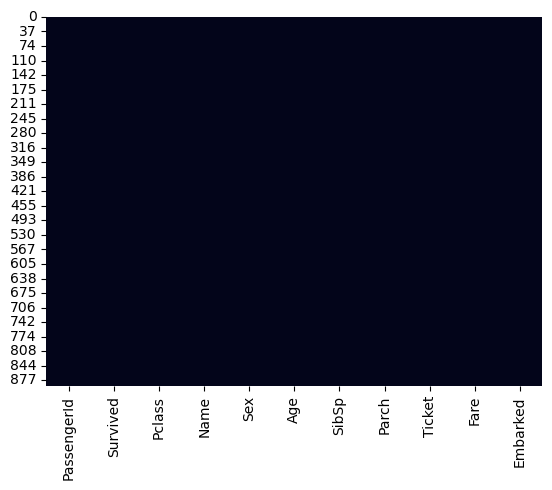

In [23]:
sns.heatmap(titanic.isnull(), cbar=False)

In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


# Model Building Process

Prepare the model before it is given as an input to the Machine Leaning(ML) Algorithm. The ML Algorithms do not understand categorical or any other data, which are not numbers, Hence, I will convert the columns with categorical data(Sex, PClass, Embarked) into numeric using One Hot Encoding.

# ONE HOT ENCODING

I will convert a few columns into categorical data to perform Logistic Regression, as Logistic Regression takes categorical /binary values. get_dummies() function is used to Convert categorical variable into dummy/indicator variables. For more information visit the Pandas documnetation:

In [26]:
pd.get_dummies(titanic['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [27]:
sex=pd.get_dummies(titanic['Sex'], drop_first=True)
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
embark=pd.get_dummies(titanic['Embarked'])

In [29]:
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [30]:
embark=pd.get_dummies(titanic['Sex'], drop_first=True)
embark.head(3)

,male
0,1
1,0
2,0


In [31]:
Pcl=pd.get_dummies(titanic['Sex'], drop_first=True)
Pcl.head(3)

,male
0,1
1,0
2,0


In [32]:
titanic=pd.concat([titanic, sex, embark,Pcl], axis=1)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,male,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0


In [34]:
titanic.drop(['Name', 'PassengerId', 'Pclass', 'Ticket', 'Sex', 'Embarked'], axis=1, inplace=True)

In [35]:
titanic.head(3)

,Survived,Age,SibSp,Parch,Fare,male,male,male
0,0,22.0,1,0,7.2500,1,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,0


# Training the Model

To train the model, first perform the train, test split and then Logistic Regression Algorithm is applied on to the data.

In [36]:
X=titanic.drop('Survived', axis=1)
y=titanic['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=4)

In [40]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [41]:
lm.fit(X_train, y_train)

LogisticRegression()

In [43]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

Note : You can change the random state to get different result.

In [44]:
prediction=lm.predict(X_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.87      0.83       145\n           1       0.75      0.63      0.69        90\n\n    accuracy                           0.78       235\n   macro avg       0.77      0.75      0.76       235\nweighted avg       0.78      0.78      0.77       235\n'

In [48]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix(y_test, prediction)

array([[126,  19],
       [ 33,  57]], dtype=int64)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,prediction)

0.7787234042553192

In [54]:
#We have the accuracy of 77% which is quite good and the model can predict the data quite accurately.

# Concluding Remarks

I notice here that accuracy score is close to 80% which makes our model a good model to predict the values accurately , here in Titanic data set our model accurately predicts as to who will survive and who will not survive.

Through Visualization we found out that females have more chances of survival than males, class 1 have more changes of survival, youth age group 20-35 yrs male from class 3 have not survived.